<a href="https://colab.research.google.com/github/Shubhangidharmik/Credit-Card-Default-Prediction/blob/main/Shubhangi_Dharmik_Credit_Card_Default_Prediction_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/ACCESS DATA/UCI_Credit_Card.csv.zip')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# **Data Cleaning**

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
780000.0        2
690000.0        1
1000000.0       1
760000.0        1
327680.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

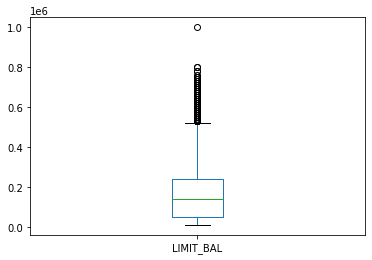

In [ ]:
df["LIMIT_BAL"].plot(kind="box")
plt.show()

# **Exploratory data analysis**

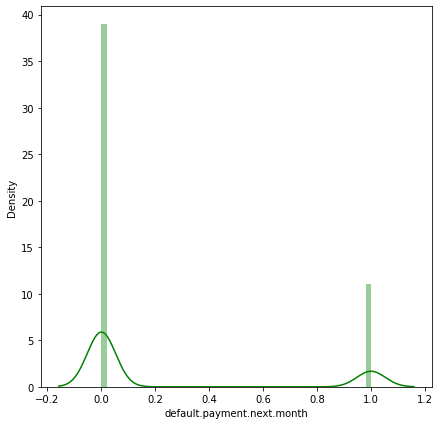

In [ ]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(df['default.payment.next.month'],color="g")

**Categorical features**

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [ ]:
categorical_features= ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
categorical_features

['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

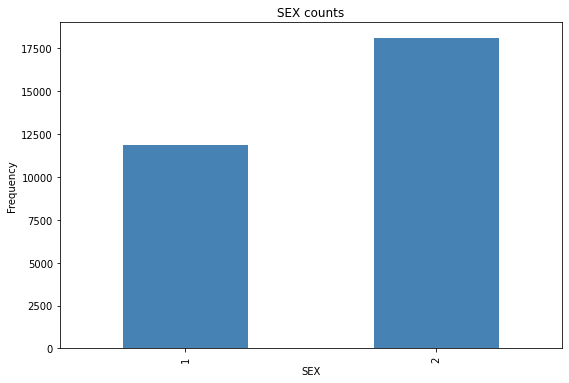

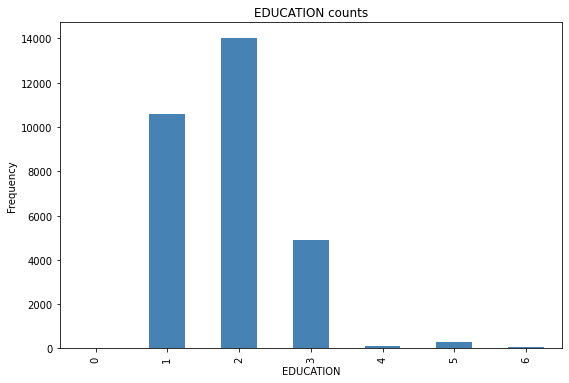

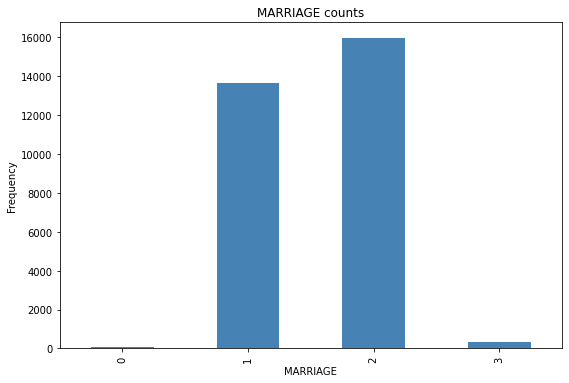

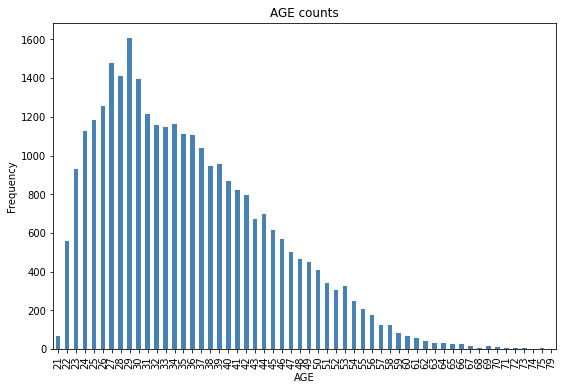

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Text(0.5, 0, 'Money Owed')

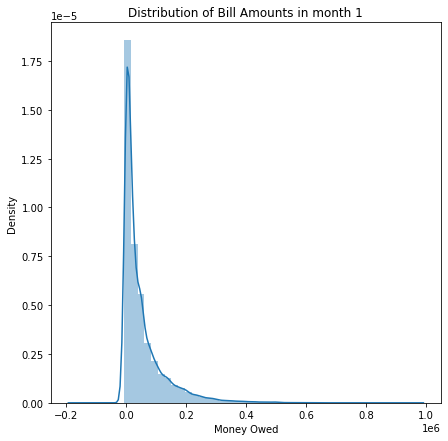

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT1'])
plt.title('Distribution of Bill Amounts in month 1')
plt.xlabel('Money Owed')

(-50000.0, 600000.0)

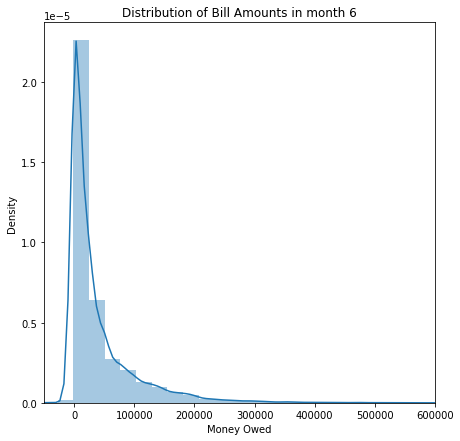

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT6'])
plt.title('Distribution of Bill Amounts in month 6')
plt.xlabel('Money Owed')
plt.xlim((-50000,600000))

Almost exactly the same. This seems to make sense. Most people won't want ot have too much debt. The vast majority of people have debt below about 50,000.

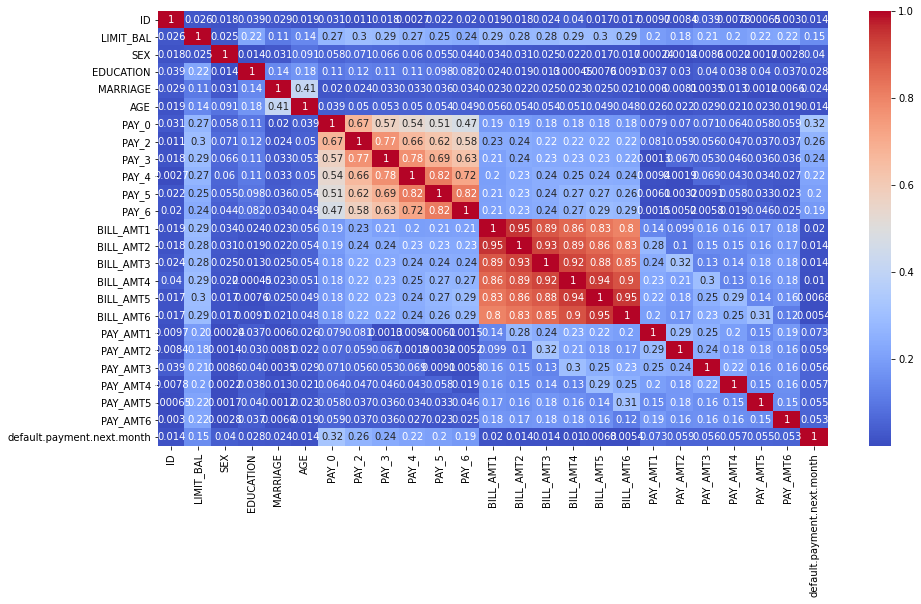

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['ID','default.payment.next.month']]])

,variables,VIF
0,LIMIT_BAL,4.037479
1,SEX,9.092210
2,EDUCATION,6.731119
3,MARRIAGE,6.265388
4,AGE,10.857679
5,PAY_0,1.918276
6,PAY_2,3.211217
7,PAY_3,3.727427
8,PAY_4,4.440120
9,PAY_5,4.985856


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['ID','default.payment.next.month','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]])

,variables,VIF
0,LIMIT_BAL,3.540018
1,SEX,9.075678
2,EDUCATION,6.686902
3,MARRIAGE,6.259640
4,AGE,10.853601
5,PAY_0,1.906519
6,PAY_2,3.160341
7,PAY_3,3.703353
8,PAY_4,4.424818
9,PAY_5,4.959355


**Numerical features**

In [ ]:
numeric_features = ['ID', 'LIMIT_BAL', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

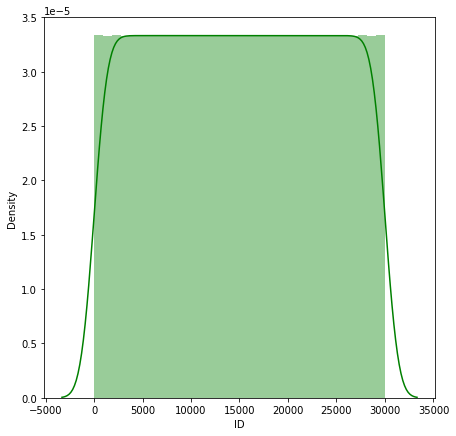

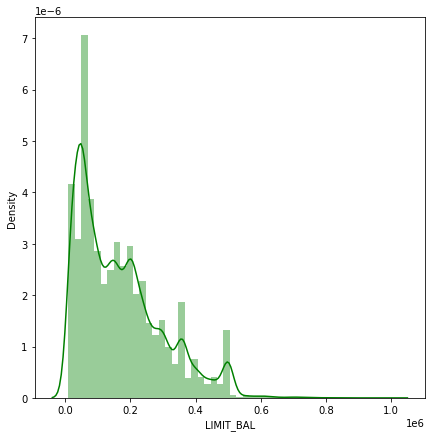

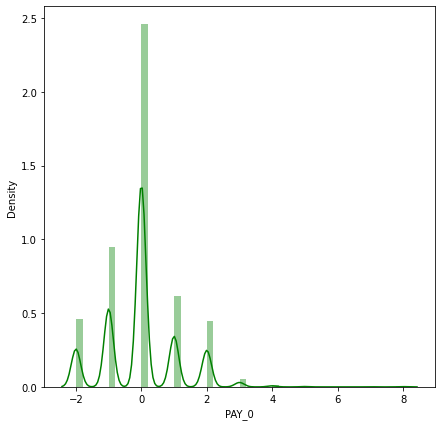

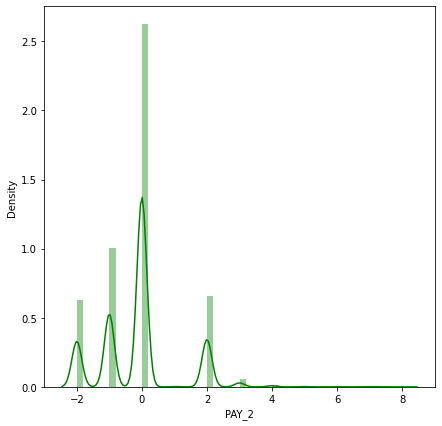

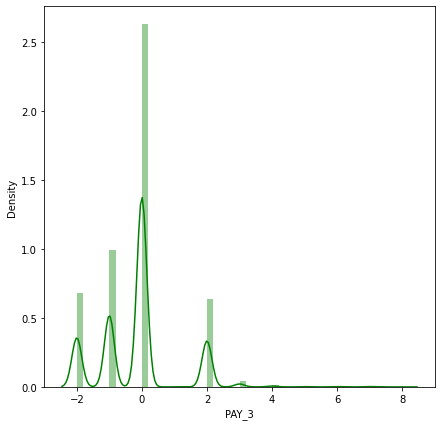

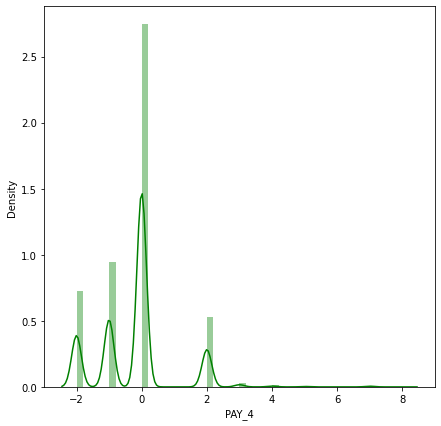

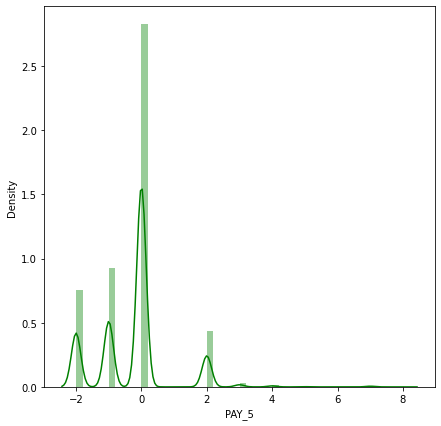

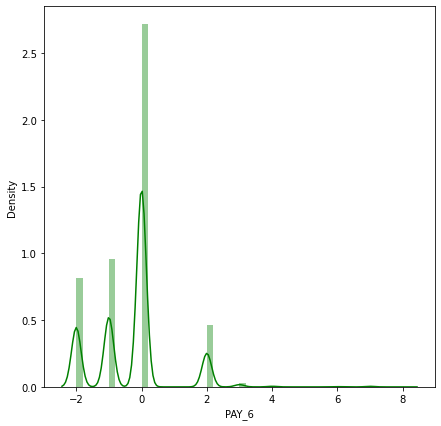

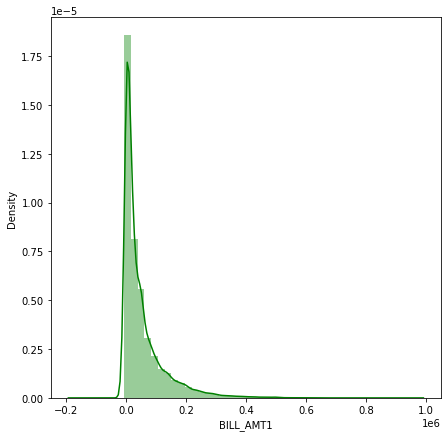

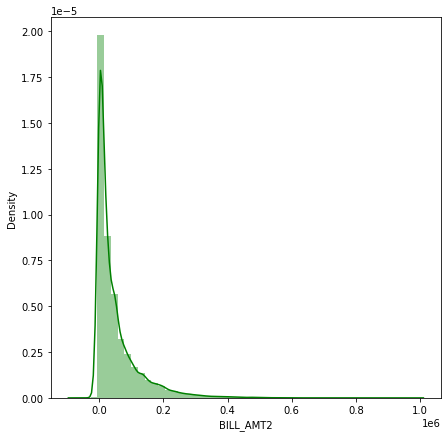

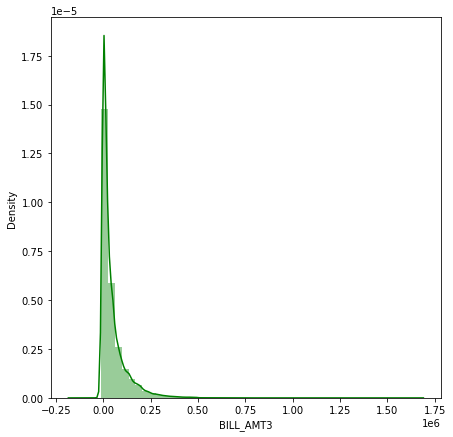

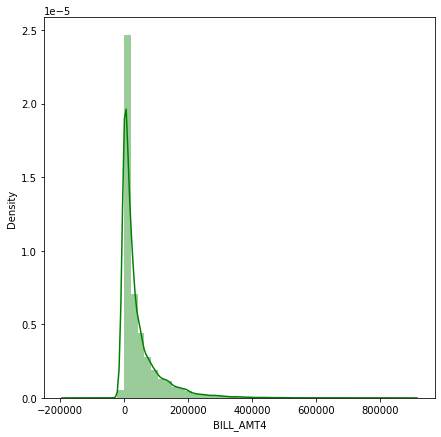

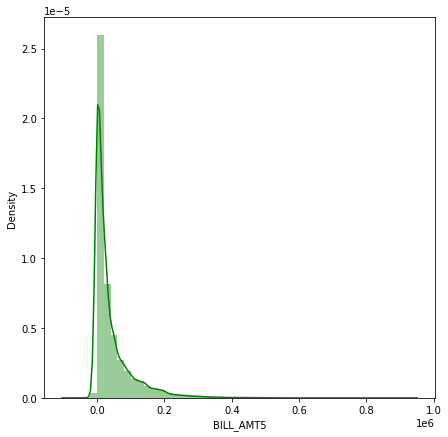

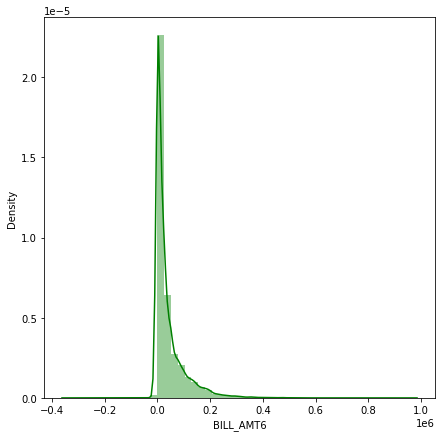

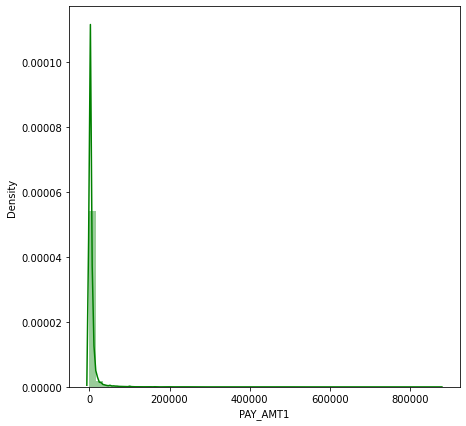

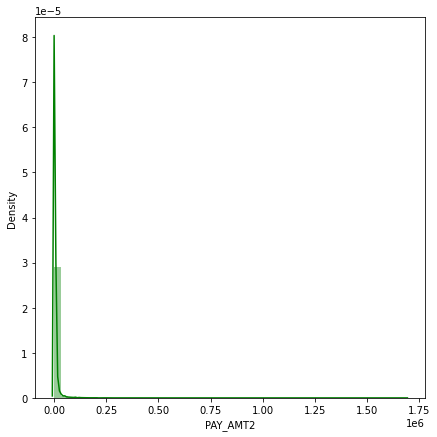

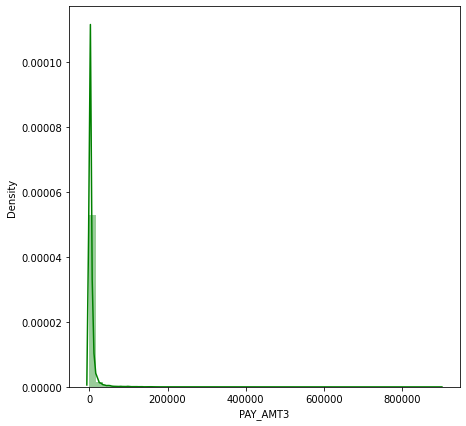

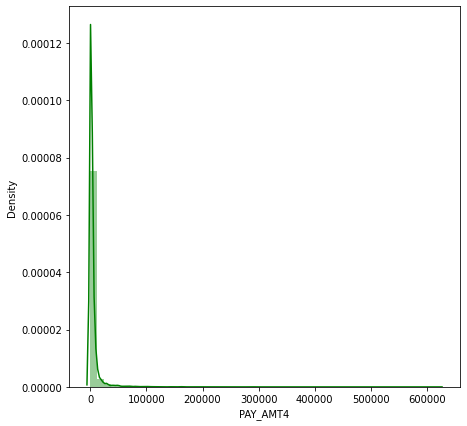

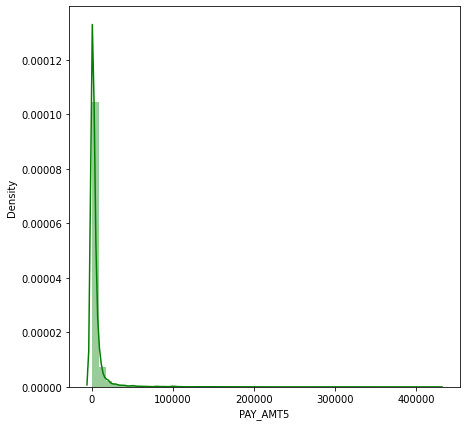

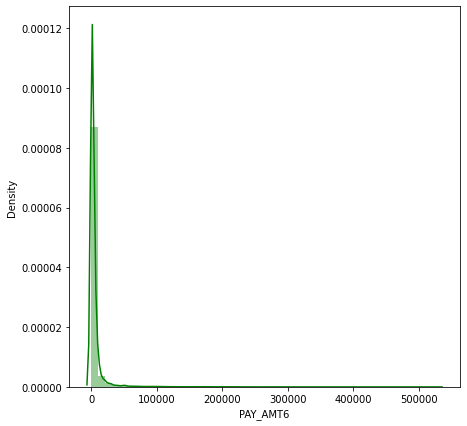

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['ID'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['LIMIT_BAL'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_0'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_2'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_3'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_4'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_5'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_6'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT1'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT2'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT3'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT4'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT5'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['BILL_AMT6'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_AMT1'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_AMT2'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_AMT3'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_AMT4'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_AMT5'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(df['PAY_AMT6'],color="g")



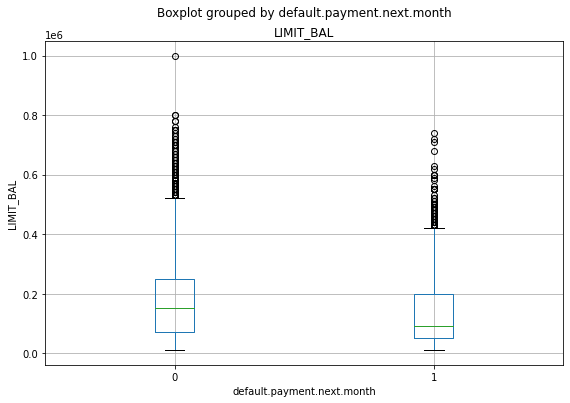

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'LIMIT_BAL', by = 'default.payment.next.month', ax = ax)
ax.set_ylabel("LIMIT_BAL")
plt.show()

# **Train test split**

In [ ]:
# Define predictor variables and target variable
X = df.drop(columns=['ID','default.payment.next.month'])
y = df['default.payment.next.month']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
0    18616
1     5384
Name: default.payment.next.month, dtype: int64

 Distribution of classes of dependent variable in test :
0    4748
1    1252
Name: default.payment.next.month, dtype: int64


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[-3.05153514e-06, -8.85606621e-04, -1.08061371e-03,
        -9.31282974e-04, -1.57433159e-02,  1.17106664e-03,
         9.10437621e-04,  8.05425014e-04,  7.72594982e-04,
         7.23240504e-04,  6.77283449e-04, -8.90560172e-06,
         4.06771064e-06,  3.03862295e-06,  7.76973935e-07,
         4.05817629e-06,  1.75900244e-06, -2.65623658e-05,
        -2.51328197e-05, -8.77369454e-06, -1.05007862e-05,
        -6.51767185e-06, -1.67605511e-06]])

In [ ]:
clf.intercept_

array([-0.00051121])

In [ ]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train, y_train)
print(accur)

0.7755833333333333


In [ ]:
accur1=metrics.accuracy_score(y_pred, y_test)

In [ ]:
print(accur1)

0.7911666666666667


In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
test_preds

array([[0.80458288, 0.19541712],
       [0.84896876, 0.15103124],
       [0.76884064, 0.23115936],
       ...,
       [0.77264901, 0.22735099],
       [0.90782122, 0.09217878],
       [0.69912786, 0.30087214]])

In [ ]:
train_preds

array([[0.88608031, 0.11391969],
       [0.90412709, 0.09587291],
       [0.93259688, 0.06740312],
       ...,
       [0.7089175 , 0.2910825 ],
       [0.61154345, 0.38845655],
       [0.8934521 , 0.1065479 ]])

In [ ]:
metrics.confusion_matrix(y_pred_train, y_train)

array([[18614,  5384],
       [    2,     0]])

In [ ]:
metrics.confusion_matrix(y_pred, y_test)

array([[4747, 1252],
       [   1,    0]])

In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5999
           1       0.00      0.00      0.00         1

    accuracy                           0.79      6000
   macro avg       0.50      0.40      0.44      6000
weighted avg       1.00      0.79      0.88      6000



In [ ]:
metrics.roc_auc_score(y_train, train_preds[:,1])

0.6495865339518451

In [ ]:
metrics.roc_auc_score(y_test, test_preds[:,1])

0.6400086735696348

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test,test_preds[:,1])

0.5017771787678145

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
# Use model's default parameters to get cross validation score
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.775, test=0.775), total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.775, test=0.775), total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ............. , accuracy=(train=0.776, test=0.775), total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV] ............. , accuracy=(train=0.776, test=0.776), total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV] ............. , accuracy=(train=0.776, test=0.776), total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


In [ ]:
scores['train_accuracy']

array([0.77536458, 0.77526042, 0.77572917, 0.77552083, 0.775625  ])

In [ ]:
scores['test_accuracy']

array([0.77541667, 0.77458333, 0.77520833, 0.775625  , 0.775625  ])

In [ ]:
scores['estimator']

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 Log

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[-4.95951967e-06 -2.56595249e-06 -3.13083709e-06 -2.72701097e-06
  -4.61312228e-05  3.44101950e-06  2.72034920e-06  2.38670801e-06
   2.37091659e-06  2.22112665e-06  2.10265812e-06 -9.39642469e-06
   1.30160849e-06  5.15084935e-06 -1.52238965e-06  7.61678638e-06
   1.25204413e-06 -2.75278601e-05 -4.53241676e-05 -6.75950516e-06
  -1.94390844e-05 -5.67106866e-06 -4.22015644e-06]]
[[-5.27272454e-06 -8.57860187e-06 -1.06114810e-05 -8.98268743e-06
  -1.50978300e-04  1.19126134e-05  9.23859980e-06  7.94308194e-06
   7.74349272e-06  7.32329156e-06  6.61957166e-06 -1.25878777e-05
   6.87685375e-06  2.87342292e-06 -4.21016095e-07  8.91487218e-06
  -1.47960461e-06 -3.52476541e-05 -3.36780204e-05 -1.00380662e-05
  -1.07224494e-05 -4.37140192e-06 -2.47194382e-06]]
[[-5.16291805e-06 -7.78187560e-06 -9.40205446e-06 -8.20396407e-06
  -1.40139626e-04  9.94614666e-06  7.72487565e-06  6.79762078e-06
   6.37701218e-06  6.22069636e-06  5.85453370e-06 -1.03873668e-05
   8.30905010e-07  6.56586597e-06  3.4

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [ ]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

0.8287916666666667

In [ ]:
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

0.8308333333333333

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(y_train,train_preds)

0.666130997572907

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,test_preds)

0.65904628415933

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(y_train,train_preds)

array([[17893,   723],
       [ 3386,  1998]])

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(y_test,test_preds)

array([[4529,  219],
       [ 796,  456]])

# **ADA boost**

In [ ]:
ada = AdaBoostClassifier()
learning_rate = [0.001,0.0001,0.01,0.1,1]
n_estimators = np.arange(1,100,10)
param_grid = {'learning_rate': learning_rate,'n_estimators': n_estimators}

grid6 = GridSearchCV(ada, param_grid=param_grid, cv=5, n_jobs=8)
grid6.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=8,
             param_grid={'learning_rate': [0.001, 0.0001, 0.01, 0.1, 1],
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Best Accuracy: ",grid6.best_score_ * 100)
print("Best params: ", grid6.best_params_)

Best Accuracy:  81.61249999999998
Best params:  {'learning_rate': 0.001, 'n_estimators': 1}


# **Conclusions**

From that we can made the conclusion given below

1. A comparison of the time required to train models vs. their predictive power.
2. It is in the lending body's interest to extend credit to the absolute fewest amount of people that might default on that credit. As it stands, we would be granting too much credit to people that end up not paying back their loans.
3. Consider the applicants marital status. Married people seem to default more often.
4. Consider the age of the applicant. Younger people are at higher risk of defaulting.
5. Establish a lower limit balance for applicants that would be considered risky.
6. Once granted credit, pay special attention to the ratio of payments to the amount owed on their balance
7. we can say that random forest model gives us more accurate model instead of remaining ones.
8. Our best prediction accuracy was around 82-83%, our lowest measured prediction accuracy was about 79%.